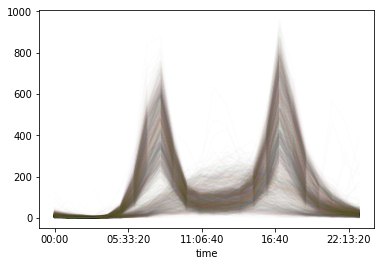

In [1]:
%matplotlib inline
from fremontworkflow.data import get_fremont_data
data = get_fremont_data()
pivoted = data.pivot_table('Total', index=data.index.time, columns=data.index.date)
pivoted.plot(legend=False, alpha=0.01)

In [2]:
import scipy
X = pivoted.fillna(0).T.values

In [4]:
from sklearn.decomposition import PCA
X2 = PCA(2, svd_solver='full').fit_transform(X)
X2.shape

(2128, 2)

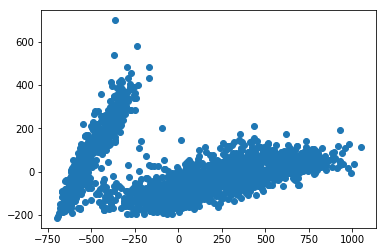

In [7]:
import matplotlib.pyplot as plt
plt.scatter(X2[:, 0], X2[:, 1])